# QC NSW vs OSW one pager

In this notebook we will build the final one pager

## Config

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys 

sys.path.append('c:/Users/Jordi Cremades/Documents/Repos/central-node')

from utils import dataframe_visualizer ,query_engines
from statsmodels.stats.proportion import proportions_ztest

# Evolution of groups

In [23]:
START_DATE = "'2023-10-01'"
END_DATE = "'2025-01-01'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
]

q = query_engines.QueryEngines(
    reset_query_logs=True
    ,reset_to_load=False
)

q.prepare_query(
    'nsw_osw_one_pager/distribution_nsw_vs_osw.sql'
    ,params=params
)

df  = q.query_run_starburst( #query_run_livedb otherwise
    output_file='distribution_nsw_vs_osw'
    ,load_from_output_file=None
    ,print_query=True
)

c:\Users/Jordi Cremades/Documents/Repos/central-node\utils\query_engines.py:235: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/8e3fa0b7428c059af0f4846577ac74803426b48c819ea49794e658055f6738b9


In [95]:
df_pivoted = df.pivot(index='calendar_date', columns='variant', values='distinct_customers').fillna(0)
df_pivoted = df_pivoted.reset_index().rename_axis(None, axis=1)
df_pivoted['perc_Variant_1'] = (df_pivoted['Variant 1']/(df_pivoted['Variant 1'] + df_pivoted['Control Group'])).round(2) 
df_pivoted

,calendar_date,Control Group,Variant 1,forced_assignment,perc_Variant_1
0,2023-10-01,0.0,162.0,0.0,1.00
1,2023-10-02,1088.0,340.0,0.0,0.24
2,2023-10-03,15040.0,2754.0,0.0,0.15
3,2023-10-04,47403.0,17120.0,0.0,0.27
4,2023-10-05,120081.0,51983.0,0.0,0.30
...,...,...,...,...,...
293,2024-07-20,0.0,1375755.0,0.0,1.00
294,2024-07-21,0.0,1196754.0,0.0,1.00
295,2024-07-22,0.0,823246.0,0.0,1.00
296,2024-07-23,0.0,722507.0,0.0,1.00


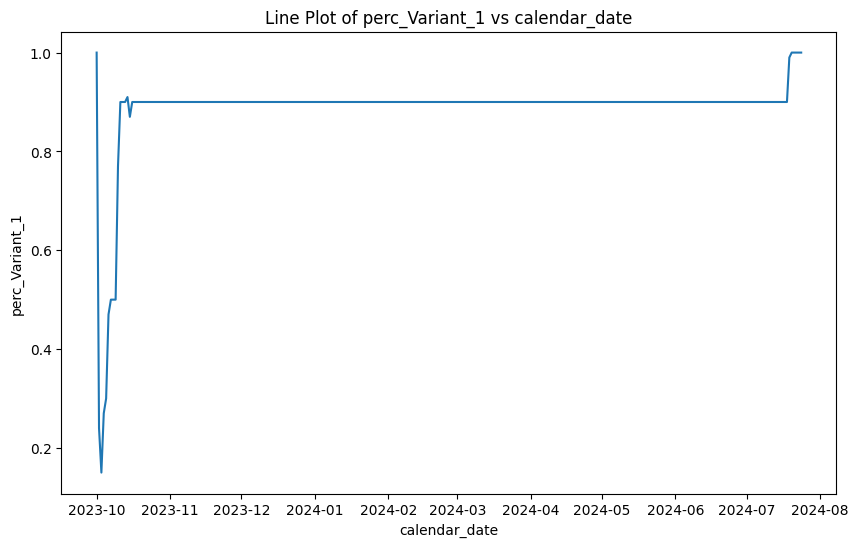

In [98]:
v = dataframe_visualizer.DataFrameVisualizer(df_pivoted)

X_COLUMN = 'calendar_date'
y_COLUMN = 'perc_Variant_1'

v.one_variable_lineplot(X_COLUMN, y_COLUMN, color='blue')

# On using the stores event to identify the NSW event

In [39]:
START_DATE = "'2024-09-01'"
END_DATE = "'2024-10-01'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
]

q = query_engines.QueryEngines(
    reset_query_logs=True
    ,reset_to_load=False
)

q.prepare_query(
    'nsw_osw_one_pager/nsw_using_stores_event.sql'
    ,params=params
)

df  = q.query_run_starburst( #query_run_livedb otherwise
    output_file='nsw_using_stores_event'
    ,load_from_output_file=None
    ,print_query=True
)   

df.head()

c:\Users/Jordi Cremades/Documents/Repos/central-node\utils\query_engines.py:235: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/8121829fe0574c8e911ffe846a3d8005ea71f83eb3e37fa327ad69181a2b6559


,_col0,category_tag,store_wall_with_category_not_null,store_wall_with_category_not_null,store_wall_events,store_wall_distinct_events
0,2024-09-01,Food,4138380,51,4138380,4138376
1,2024-09-01,Groceries,308996,21,308996,308995
2,2024-09-01,Health,44432,5,44432,44427
3,2024-09-01,Others,808,2,808,808
4,2024-09-01,Quiero,17,1,17,17


In [40]:
START_DATE = "'2024-09-01'"
END_DATE = "'2024-10-01'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
]

q = query_engines.QueryEngines(
    reset_query_logs=True
    ,reset_to_load=False
)

q.prepare_query(
    'nsw_osw_one_pager/nsw_using_stores_event_v2.sql'
    ,params=params
)

df  = q.query_run_starburst( #query_run_livedb otherwise
    output_file='nsw_using_stores_event_v2'
    ,load_from_output_file=None
    ,print_query=True
)   

df

c:\Users/Jordi Cremades/Documents/Repos/central-node\utils\query_engines.py:235: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/c727e1563112347f2058dab16a8820f9b6ce91882fbb51ee699c5071e86cbcdc


,p_creation_date,category_id,distinct_category_tags_assigned,n_distinct_events
0,2024-09-01,1,1,3998018
1,2024-09-01,3,1,18956
2,2024-09-01,4,1,255851
3,2024-09-01,22,1,101584
4,2024-09-01,52,1,51112
...,...,...,...,...
404,2024-09-04,21087,1,60
405,2024-09-04,21089,1,94
406,2024-09-04,21090,1,295
407,2024-09-04,21119,1,1242


In [41]:
df['distinct_category_tags_assigned'].value_counts()

distinct_category_tags_assigned
1    383
0     26
Name: count, dtype: int64

In [45]:
grouped_df = df.groupby(['p_creation_date', 'distinct_category_tags_assigned'])['n_distinct_events'].sum().reset_index()
grouped_df


,p_creation_date,distinct_category_tags_assigned,n_distinct_events
0,2024-09-01,0,1
1,2024-09-01,1,4629652
2,2024-09-02,0,44
3,2024-09-02,1,3350116
4,2024-09-03,0,55
5,2024-09-03,1,3185485
6,2024-09-04,0,45
7,2024-09-04,1,3132944


# %CVR evolution

In [55]:
START_DATE = "'2023-10-01'"
END_DATE = "'2024-07-15'"

params = [
    {'name':'start_date', 'value': str(START_DATE)},
    {'name':'end_date', 'value': str(END_DATE)},
]

q = query_engines.QueryEngines(
    reset_query_logs=True
    ,reset_to_load=False
)

q.prepare_query(
    'nsw_osw_one_pager/cvr_evolution.sql'
    ,params=params
)

df  = q.query_run_starburst( #query_run_livedb otherwise
    output_file='cvr_evolution'
    ,load_from_output_file=None
    ,print_query=True
)   

df.sort_values(by='end_time')

c:\Users/Jordi Cremades/Documents/Repos/central-node\utils\query_engines.py:235: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/6a8dbf8a72178bc95560887cde48626ae66676ff20e9610d4f8dca52366be6d9
An error occurred while running the Starburst query: Execution failed on sql: with calendar_dates as (
    select
        calendar_date
    from unnest(sequence(date('2023-10-01'),date('2024-07-15'),interval '1' day)) as dates (calendar_date)
    where 1=1
)

,nsw_groups as (
    select
        allocation_key as customer_id,
        variant,
        first_exposure_datetime as start_time,
        coalesce(lag(first_exposure_datetime) over (partition by allocation_key order by first_exposure_datetime desc), date_trunc('second', TIMESTAMP ''2024-07-15'' AT TIME ZONE 'UTC')) as end_time
    from delta.mlp__experiment_first_exposure__odp.first_exposure
    where 1=1
        and p_first_exposure_date in (select calendar_date from calendar_dates)
        and experiment_toggle_id = 'ZAP_CA

KeyError: 'end_time'